# ❤️❤ ❤️**Desafio Final**❤️ ❤❤️
# Estatísticas, Frequências e Medidas

Considerando a base de dados *enem_2023.json* (dados fictícios), responda as questões abaixo:


Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.


O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

🎯📢**Neste primeiro momento, vamos trabalhar no preparo dos dados para iniciar as
análises, carregando as bibliotecas necessárias, o dataset e visualizando as primeiras informações** 😎

In [1]:
#Carregando e instalando os pacotes necessários para a análise
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [2]:
#Carregando o dataset enem_2023. Obs: É necessário fazer o upload do dataset todas vez que for executar,
# pois ele é apagado quando encerra a sessão.

#Importando o dataset
from google.colab import files

# Carregando o dataset do meu local

uploaded = files.upload()



Saving enem_2023.json to enem_2023.json


In [3]:
#Confirmando qual pasta está em execução para saber o caminho usar ao carregar o arquivo json
!pwd

/content


In [4]:
caminho_arquivo = '/content/enem_2023.json'
df = pd.read_json(caminho_arquivo)
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [5]:
#Verificar os nomes das colunas e tipos de dados existente no arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


O conjunto de dados é composto por 5 colunas que representam notas, sendo variáveis numéricas contínuas do tipo float64. Essas notas podem incluir valores decimais. Além disso, há uma coluna que contém variáveis do tipo object, caracterizada por strings que armazenam informações categóricas. Neste contexto, a coluna do tipo object representa dados categóricos, como o gênero, podendo assumir valores como "masculino" ou "feminino".

In [6]:
# Analisando as estatísticas descritvas,  inicialmente,  com o método da biblioteca Pandas 'describe'
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [7]:
#Incluindo o cálculo da amplitude e da variância em uma função describe_new
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

In [8]:
describe_new(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035
variancia,7057.564698,6054.632515,6203.201190,7507.893239,13303.309244


In [9]:
#Verficando a existência de valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64


**Agora vamos começar as análises** 👀💻🔎

1. Qual das disciplinas tem a maior amplitude de nota?


In [10]:
df.head(15)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [11]:
# Criando uma lista para armazenar as amplitudes de cada disciplina
maior_amplitude = 0
amplitude_disciplina = {}

In [12]:
# Visualizando as amplitudes das disciplinas
# Calculando as amplitudes para cada disciplina e arredondando os números para
# 2 casas decimais

for coluna in ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']:

    amplitude = df[coluna].max() - df[coluna].min()

    amplitude_disciplina[coluna] = amplitude

for disciplina, amplitude in amplitude_disciplina.items():

    print(f'A amplitude das notas em {disciplina} é: {amplitude: .2f}')



A amplitude das notas em Linguagens é:  517.46
A amplitude das notas em Ciências humanas é:  474.02
A amplitude das notas em Ciências da natureza é:  487.60
A amplitude das notas em Matemática é:  488.08
A amplitude das notas em Redação é:  729.16


Como podemos analisar, a amplitude da nota de redação é a maior, inferindo que teve candadatos com notas muito baixas e notas altas. Pode-se perceber desde já que há esxistência de pontos muito distantes da média.

In [13]:
# Ordenando as disciplinas do maior para o menor
disciplinas_ordenadas = sorted(amplitude_disciplina.items(), key=lambda x: x[1], reverse=True)

for i, (disciplina, amplitude) in enumerate(disciplinas_ordenadas, start=1):
    print(f'{i}º - {disciplina}: {amplitude:.2f}')

1º - Redação: 729.16
2º - Linguagens: 517.46
3º - Matemática: 488.08
4º - Ciências da natureza: 487.60
5º - Ciências humanas: 474.02


In [14]:
# Retornando apenas a disciplina com maior amplitude
disciplinas_maior_amplitude = []
for coluna in ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']:
    amplitude = df[coluna].max() - df[coluna].min()

    if amplitude > maior_amplitude:
        maior_amplitude = amplitude
        disciplinas_maior_amplitude = [coluna]
    elif amplitude == maior_amplitude:
        disciplinas_maior_amplitude.append(coluna)

for disciplina in disciplinas_maior_amplitude:
    print(f'A disciplina com a maior amplitude é {disciplina} com amplitude de{maior_amplitude: .2f}')


A disciplina com a maior amplitude é Redação com amplitude de 729.16


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [15]:
#Calculando a media para todo o df, sem considerar a coluna sexo, que é a última coluna do DF e é categórica
# Estou utilizando o iloc[:, -1 porque a coluna sexo é a ltima coluna no dataset, asim desconsidera esta coluna para o cálculo
df.iloc[:, :-1].mean(numeric_only=True)


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [16]:
# Media da media das disciplinas
df.iloc[:, :-1].mean(numeric_only=True).mean(numeric_only=True)

542.9263730172955

A Redação é a disciplina com maior média de nota

In [17]:
# Pacote com visualização de dados faltantes no df
import missingno as msno

<Axes: >

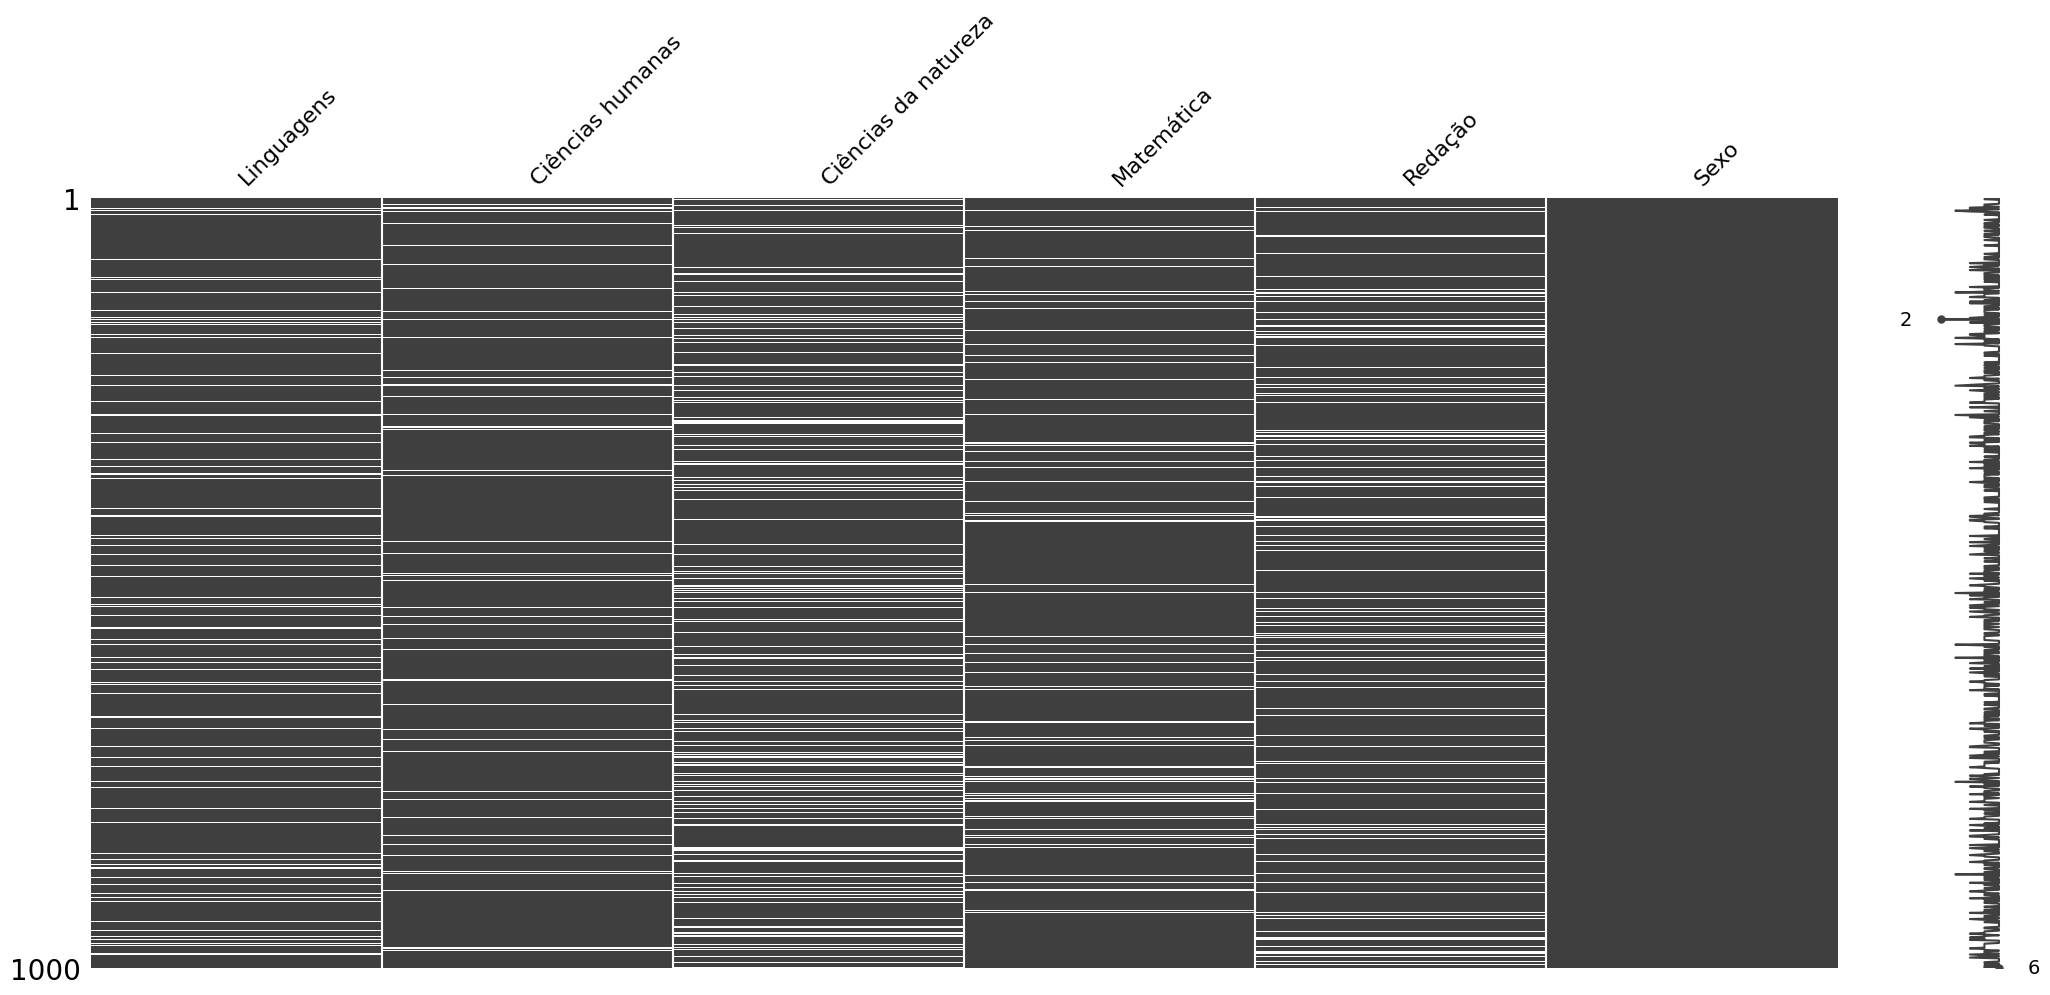

In [18]:
# Nesta visualização, podemos ter uma noção ao visualizar onde estão os dados faltantes
msno.matrix(df)

In [19]:
# Removendo valores nulos do df
# Este método remove os valores nulos
df_sem_nulos = df.dropna()

<Axes: >

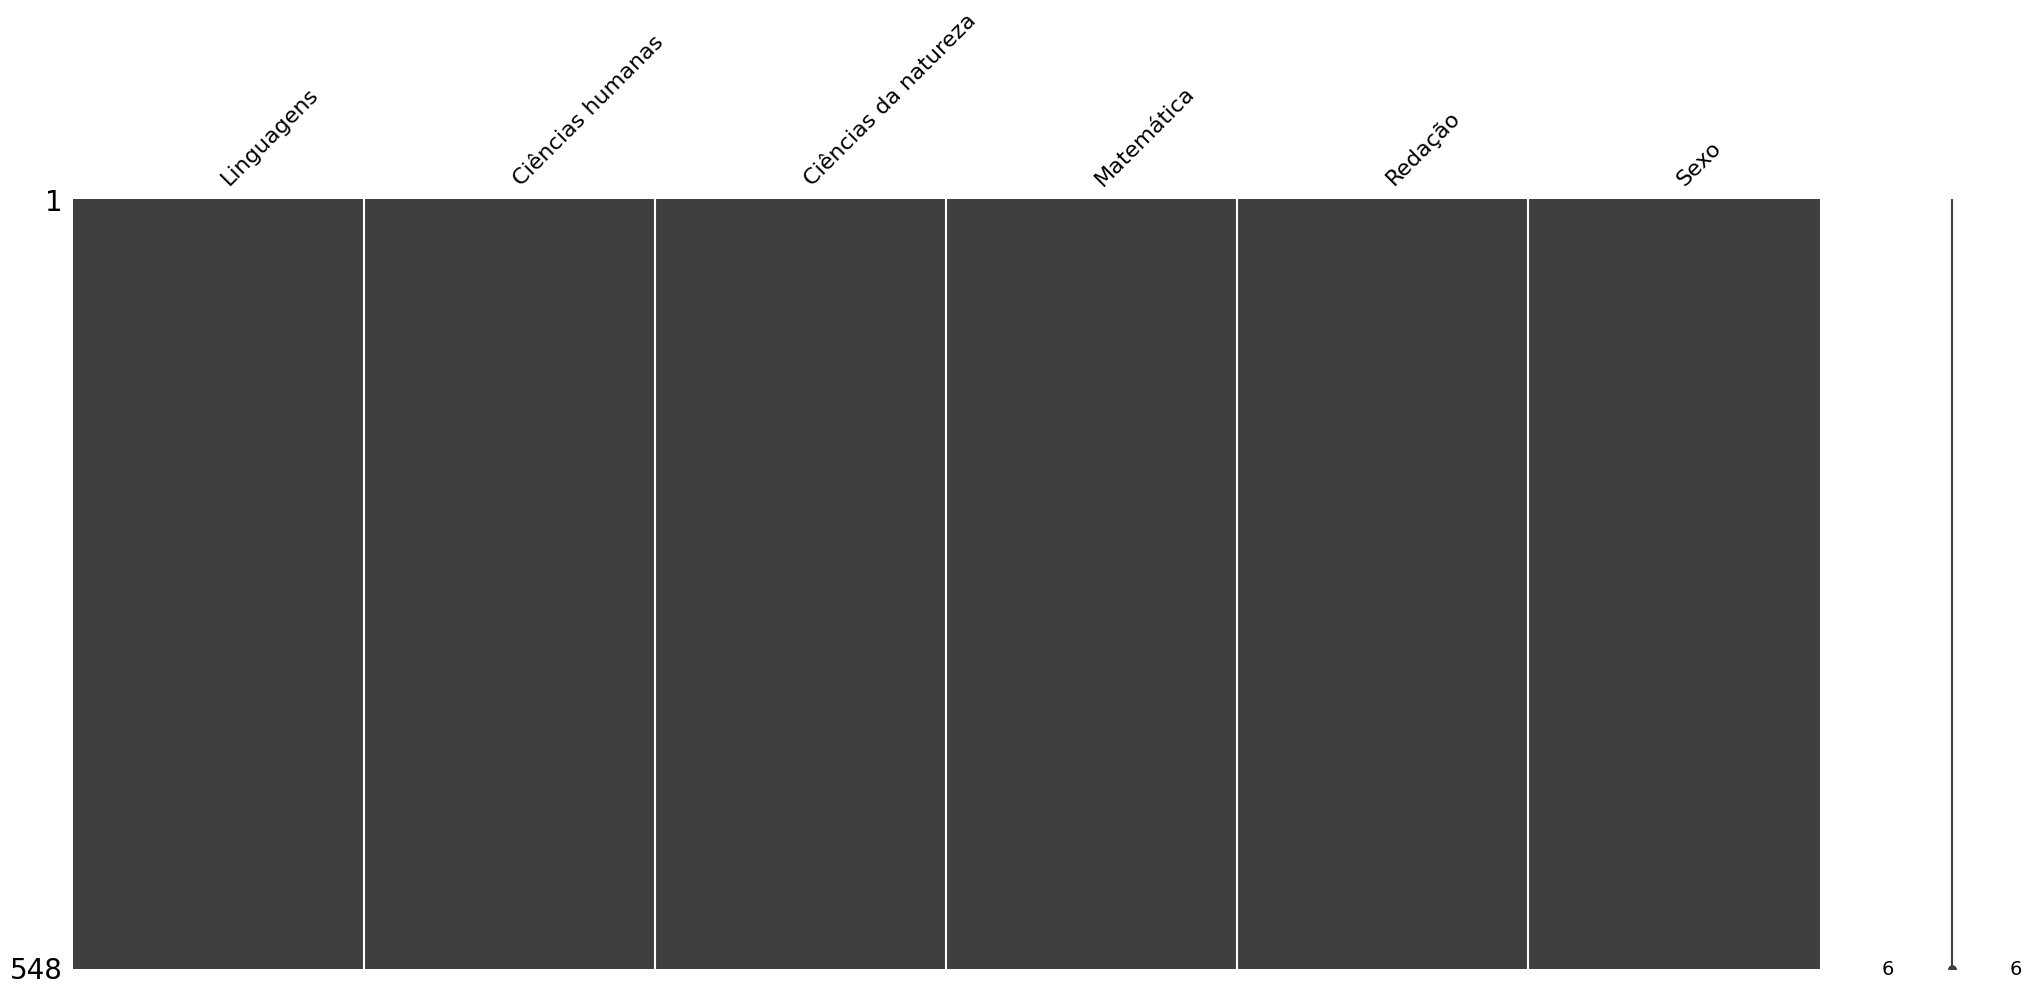

In [20]:
# Nesta visualização podemos ver que já não tem mais valores nulos a considerar

msno.matrix(df_sem_nulos)

In [21]:
#Verificando a contagem de valores nulos
check_nulos = df_sem_nulos.isnull().sum()
print(check_nulos)

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64


In [22]:
# Calculando a mediana sem considerar os valores nulos no cálculo e a ultima coluna que é uma variável categórica

mediana_df = df_sem_nulos.iloc[:, :-1].median(numeric_only=True)

for coluna, vlr_median in mediana_df.items():

   print(f'Mediana da coluna {coluna}: {vlr_median:.2f}')

Mediana da coluna Linguagens: 517.13
Mediana da coluna Ciências humanas: 528.50
Mediana da coluna Ciências da natureza: 502.94
Mediana da coluna Matemática: 532.96
Mediana da coluna Redação: 639.60


In [23]:
df.head(15)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [24]:
#Criando uma cópia do df original por segurança
df_media_ufpe = df.copy()

# Removendo valores ausentes
df_media_ufpe = df_media_ufpe.dropna()

In [45]:
#Criando uma nova coluna de Media Ponderada e fazendo o cálculo da média ponderada para cada coluna (usei a formula da media ponderada)

df_media_ufpe['Media Ponderada']= (
    df_media_ufpe['Redação'] * 2 +
    df_media_ufpe['Matemática']*4 +
    df_media_ufpe['Linguagens']* 2 +
    df_media_ufpe['Ciências humanas'] * 1+
    df_media_ufpe['Ciências da natureza']* 1) /10


#Ordenando os estudantes da maior nota para menor
df_media_ufpe = df_media_ufpe.sort_values(by= 'Media Ponderada', ascending=False)

#Criando a variável que contém os 500 top estudantes, que são os  500 mais bem colocados
ufpe_top_500 = df_media_ufpe.head(500)

# Calculando a média da nota dos 500 estudantes mais bem colocados (uso o parâmetro  'numeric_only=True' para usar apenas variáveis numéricas no cálculo)
media = ufpe_top_500.mean(numeric_only=True)

#Calculando o desvio padrão dos 500 estudantes mais bem colocados
dp = ufpe_top_500.std(numeric_only=True)

#Imprimindo a média de cada disciplina
print("Média das notas:")
print(media.round(2))

#Imprimindo o desvio padrão  de cada disciplina
print("\nDesvio padrão das notas:")
print(dp.round(2))

Média das notas:
Linguagens              522.84
Ciências humanas        529.92
Ciências da natureza    503.09
Matemática              547.41
Redação                 652.29
Media Ponderada         557.29
dtype: float64

Desvio padrão das notas:
Linguagens               80.77
Ciências humanas         77.13
Ciências da natureza     78.61
Matemática               83.24
Redação                 109.96
Media Ponderada          40.44
dtype: float64


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [47]:
#Criando uma variável com o número de vagas

num_vagas = 40

# Selecionando os alunos que se aplicaram as 40 vagas do curso de Ciencias da Comp.

alunos_ciencia_comp = ufpe_top_500.head(num_vagas)

#Calculando a media e a variância

media_alunos_ciencia_comp = alunos_ciencia_comp.mean(numeric_only=True)

var_alunos_ciencia_comp = alunos_ciencia_comp.var(numeric_only=True)

#Imprimindo a média de cada disciplina
print("Média das notas: ")
print(media_alunos_ciencia_comp.round(2))


#Imprimindo a variância de cada disciplina
print("Variância das notas: ")
print(var_alunos_ciencia_comp.round(2))


Média das notas: 
Linguagens              586.28
Ciências humanas        554.33
Ciências da natureza    522.30
Matemática              655.65
Redação                 747.52
Media Ponderada         636.68
dtype: float64
Variância das notas: 
Linguagens              10535.67
Ciências humanas         6410.72
Ciências da natureza     5179.61
Matemática               6399.33
Redação                 11030.28
Media Ponderada           295.77
dtype: float64


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [27]:
dfo_q3_mat = df['Matemática'].quantile([0.75])
dfo_q3_ling = df['Linguagens'].quantile([0.75])

In [28]:
# Calcular o terceiro quartil para Matemática e Linguagens
df_q3_mat = df_media_ufpe['Matemática'].quantile([0.75])
df_q3_ling = df_media_ufpe['Linguagens'].quantile([0.75])

In [29]:
# Imprime o valor do terceiro quartil
print("Teto do q3 para Matemática:\n", round(df_q3_mat.values[0], 2))

print("Teto do q3 para Linguagens:\n", round(df_q3_ling.values[0], 2))

#print("Teto do q3 para Matemática:\n", round(dfo_q3_mat.values[0], 2))

#print("Teto do q3 para Linguagens:\n", round(dfo_q3_ling.values[0], 2))

Teto do q3 para Matemática:
 591.34
Teto do q3 para Linguagens:
 572.65


Analisando o resultado da análise do valor do q3 de matemática e linguagens, aproximadamente 75% dos alunos tem as médias abaixo de 591,34 para matemática e 75% dos alunos tem a média da nota em Linguagens abaixo de  572,65. O que significa que a maioria dos alunos não alcançam uma média superior a essas notas, nestas disciplinas.

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

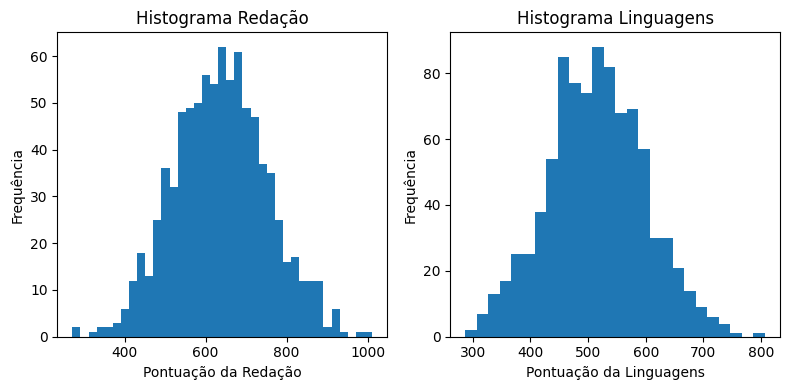

In [30]:
# Histograma de Linguagens e Redação


# Criando os subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot para Redação
if df_media_ufpe['Redação'].notnull().any():
    redacao_bins = np.arange(min(df['Redação']), max(df['Redação']) + 20, 20)
    axes[0].hist(df['Redação'], bins=redacao_bins)
    axes[0].set_title('Histograma Redação')
    axes[0].set_xlabel('Pontuação da Redação')
    axes[0].set_ylabel('Frequência')


if df_media_ufpe['Linguagens'].notnull().any():
    linguagens_bins = np.arange(min(df['Linguagens']), max(df['Linguagens']) + 20, 20)
    axes[1].hist(df['Linguagens'], bins=linguagens_bins)
    axes[1].set_title('Histograma Linguagens')
    axes[1].set_xlabel('Pontuação da Linguagens')
    axes[1].set_ylabel('Frequência')

# Ajustando o layout
plt.tight_layout()

plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

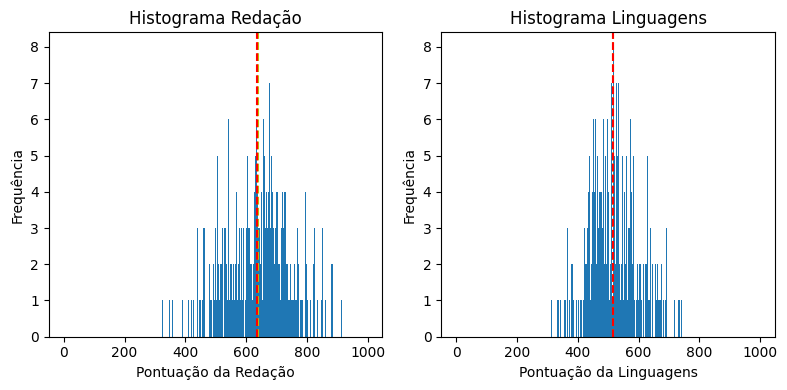

In [31]:
# Histograma de Linguagens e Redação



# Definindo o range fixo
bins_redacao = np.arange(0, 1000)
bins_linguas = np.arange(0, 1000)

# Criando os subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot para Redação
if df_media_ufpe['Redação'].notnull().any():
    axes[0].hist(df['Redação'], bins=bins_redacao)
    axes[0].set_title('Histograma Redação')
    axes[0].set_xlabel('Pontuação da Redação')
    axes[0].set_ylabel('Frequência')


    # Adicionando linha da média
    media_redacao = df['Redação'].mean()
    axes[0].axvline(media_redacao, color='y', linestyle='dashed', linewidth=1.5)

    # Adicionando linha da mediana
    mediana_redacao = df['Redação'].median()
    axes[0].axvline(mediana_redacao, color='r', linestyle='dashed', linewidth=1.5)

# Plot para Redação para lingugens
if df_media_ufpe['Linguagens'].notnull().any():
    axes[1].hist(df['Linguagens'], bins=bins_linguas)
    axes[1].set_title('Histograma Linguagens')
    axes[1].set_xlabel('Pontuação da Linguagens')
    axes[1].set_ylabel('Frequência')

    # Adicionando linha da média
    media_linguas = df['Linguagens'].mean()
    axes[1].axvline(media_linguas, color='y', linestyle='dashed', linewidth=1.5)

    # Adicionando linha da mediana
    mediana_linguas = df['Linguagens'].median()
    axes[1].axvline(mediana_linguas, color='r', linestyle='dashed', linewidth=1.5)

# Ajustando o layout
plt.tight_layout()

plt.show()

A concentração dos ados começam a partir do intervalo de 400 a 50 em linguagens e para redação não teve mudanças significativas, na minha análise continuam concentrados, mesmo com um intervalo maior de pontos.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.

IQR da coluna Ciências da natureza: 104.04260217492504
Número de outliers em Ciências da natureza: 3

IQR da coluna Redação: 159.52150290787495
Número de outliers em Redação: 4



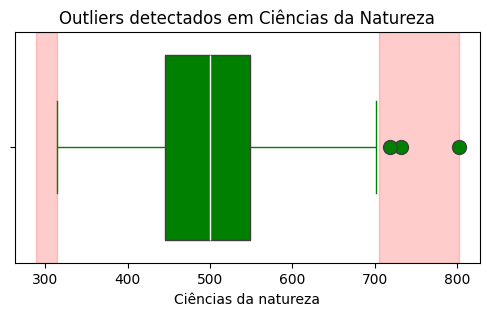

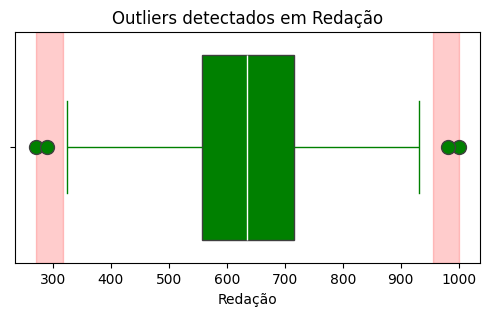

In [49]:
# BOXPLOT de Ciências da Natureza e Redação

  # Netsa df estou removendo os valores nulos
def find_outlier_iqr(dataset, colname):
    # Remove valores nulos
    dataset = dataset.dropna(subset=[colname])

    # Calcula quartis
    q25, q75 = np.nanpercentile(dataset[colname], 25), np.nanpercentile(dataset[colname], 75)

    # Calcula IQR
    iqr = q75 - q25

    # Calcula limites para outliers
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print(f"IQR da coluna {colname}: {iqr}")

    # Identifica outliers
    outliers = dataset[(dataset[colname] > upper) | (dataset[colname] < lower)][colname].tolist()

    print(f'Número de outliers em {colname}: {len(outliers)}\n')

    return lower, upper, outliers

# Exemplo de uso para 'Ciências da Natureza'
lower_cn, upper_cn, outliers_cn = find_outlier_iqr(df, 'Ciências da natureza')

# Exemplo de uso para 'Redação'
lower_red, upper_red, outliers_red = find_outlier_iqr(df, 'Redação')

# Boxplot para 'Ciências da Natureza' excluindo valores nulos e alterando a cor da caixa e outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='Ciências da natureza', data=df.dropna(subset=['Ciências da natureza']),
            boxprops=dict(facecolor='green'),  # Caixa verde
            flierprops=dict(markerfacecolor='green', marker='o', markersize=10),  # Outliers verdes
            whiskerprops=dict(color='green'),  # Cor da linha do boxplot (whisker)
            capprops=dict(color='green'), #cor
            medianprops=dict(color='white')) #cor da linha da mediana
plt.axvspan(xmin=lower_cn, xmax=df['Ciências da natureza'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper_cn, xmax=df['Ciências da natureza'].max(), alpha=0.2, color='red')
plt.title("Outliers detectados em Ciências da Natureza")
plt.show()

# Boxplot para 'Redação' excluindo valores nulos e alterando a cor da caixa e outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='Redação', data=df.dropna(subset=['Redação']),
            boxprops=dict(facecolor='green'),  # Caixa verde
            flierprops=dict(markerfacecolor='green', marker='o', markersize=10), # Outliers azuis
            whiskerprops=dict(color='green'),  # Cor da linha do boxplot (whisker)
            capprops=dict(color='green'),
            medianprops=dict(color='white'))
plt.axvspan(xmin=lower_red, xmax=df['Redação'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper_red, xmax=df['Redação'].max(), alpha=0.2, color='red')
plt.title("Outliers detectados em Redação")
plt.show()


 Nestes dois gráficos, é possível inferir que os dados são simétricos, pois a linha da mediana está no centro da caixa. Para a disciplina de Ciências da Natureza, se visualiza 3 outliers bem acima do limite superior e as notas de Redação temos 4 outliers, dois abaixo do limite inferior e 2 bem acima do limite superior. Além disso, a posição da caixa do Boxplot está em cima da media para as duas disciplinas, no caso de Redação a média é em torno de 600 pontos e de Ciências da Natureza de  522 pontos.

IQR da coluna Linguagens: 113.27531763690007
Número de outliers em Linguagens: 5

IQR da coluna Ciências humanas: 105.97740588044996
Número de outliers em Ciências humanas: 8

IQR da coluna Matemática: 113.73999224952502
Número de outliers em Matemática: 3



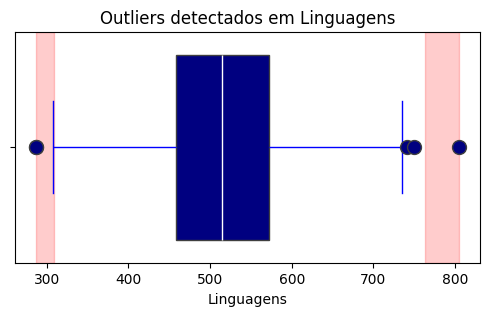

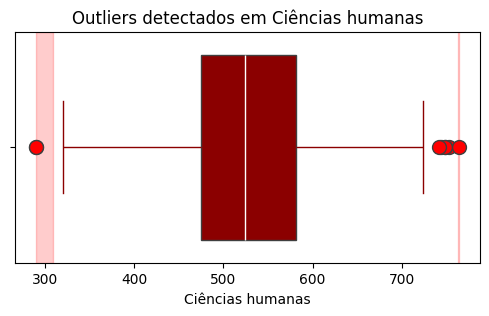

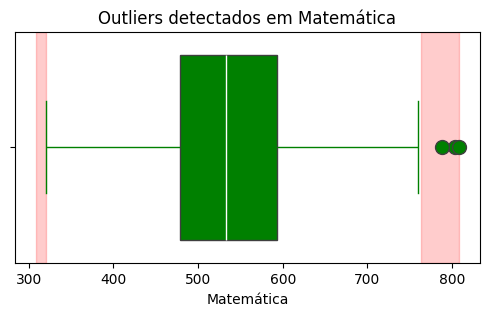

In [33]:
# Testando para outras disciplinas
lower_cn, upper_cn, outliers_cn = find_outlier_iqr(df, 'Linguagens')
lower_cn, upper_cn, outliers_cn = find_outlier_iqr(df, 'Ciências humanas')
lower_cn, upper_cn, outliers_cn = find_outlier_iqr(df, 'Matemática')

plt.figure(figsize=(6, 3))
sns.boxplot(x='Linguagens', data=df.dropna(subset=['Linguagens']),
            boxprops=dict(facecolor='navy'),  # Caixa azul
            flierprops=dict(markerfacecolor='navy', marker='o', markersize=10),  # Outliers laranjas
            whiskerprops=dict(color='blue'),  # Cor da linha do boxplot (whisker)
            capprops=dict(color='blue'),  # Cor da linha do boxplot (cap)
            medianprops=dict(color='white'))  # Cor da linha da mediana
plt.axvspan(xmin=lower_cn, xmax=df['Linguagens'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper_cn, xmax=df['Linguagens'].max(), alpha=0.2, color='red')
plt.title("Outliers detectados em Linguagens")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x='Ciências humanas', data=df.dropna(subset=['Ciências humanas']),
            boxprops=dict(facecolor='darkred'),  # Caixa verde
            flierprops=dict(markerfacecolor='red', marker='o', markersize=10),  # Outliers verdes
            whiskerprops=dict(color='darkred'),  # Cor da linha do boxplot (whisker)
            capprops=dict(color='darkred'), #cor
            medianprops=dict(color='white')) #cor da linha da mediana
plt.axvspan(xmin=lower_cn, xmax=df['Ciências humanas'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper_cn, xmax=df['Ciências humanas'].max(), alpha=0.2, color='red')
plt.title("Outliers detectados em Ciências humanas")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x='Matemática', data=df.dropna(subset=['Matemática']),
            boxprops=dict(facecolor='green'),  # Caixa verde
            flierprops=dict(markerfacecolor='green', marker='o', markersize=10),  # Outliers verdes
            whiskerprops=dict(color='green'),  # Cor da linha do boxplot (whisker)
            capprops=dict(color='green'), #cor
            medianprops=dict(color='white')) #cor da linha da mediana
plt.axvspan(xmin=lower_cn, xmax=df['Matemática'].min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper_cn, xmax=df['Matemática'].max(), alpha=0.2, color='red')
plt.title("Outliers detectados em Matemática")
plt.show()

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [34]:
#Definindo a fnção para remover e substituir os Outliers por NaN

def replace_na_outlier_zscore(dataset, threshold, colname):
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
        z_score = (i - mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
            val.append(np.nan)
        else:
            val.append(i)

    return val

# Criar uma cópia do DataFrame original
df_outlier_na = df.copy()

# Cria a lista de colunas na qual serão substituídos os outliers
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Itera sobre as colunas e aplica a função
for coluna in disciplinas:
    df_outlier_na[coluna] = replace_na_outlier_zscore(df, 3, coluna)

# Remove as linhas com outliers
df_no_outliers = df_outlier_na.dropna()

# Calcula a média nacional antes e depois
media_nacional_antes = df[disciplinas].mean(numeric_only=True)
media_nacional_depois = df_no_outliers[disciplinas].mean(numeric_only=True)

# Calcula a diferença percentual
diff_percentual = ((media_nacional_antes - media_nacional_depois) / media_nacional_antes) * 100

# Verifica se a diferença percentual é significativa (>5%)
significativo = abs(diff_percentual) > 5


#Calcula a media das disciplinas total e a diferença percentual
media_df_antes = media_nacional_antes.mean(numeric_only=True)
media_df_depois = media_nacional_depois.mean(numeric_only=True)

diferença_percentual = ((media_df_antes  - media_df_depois) /media_df_antes ) * 100

significativo_total = abs(diferença_percentual) > 5

# Imprime os resultados
for coluna in disciplinas:
    print(f'Média nacional de {coluna} com outliers: {round(media_nacional_antes[coluna], 4)}', end='\n\n')
    print(f'Média nacional de {coluna} sem outliers: {round(media_nacional_depois[coluna], 4)}', end='\n\n')
    print(f'Diferença percentual em {coluna}: {round(diff_percentual[coluna], 2)}%', end='\n\n')
    print(f'Alteração significativa em {coluna}: {"Sim" if significativo[coluna] else "Não"}\n')

# Imprime a média do DataFrame inteiro
print('Média total do DataFrame com outliers:', round(media_df_antes, 4), end='\n\n')
print('Média total do DataFrame sem outliers:', round(media_df_depois , 4), end='\n\n')
print(f'Alteração significativa em : {"Sim" if significativo_total >5 else "Não"}\n')

Média nacional de Linguagens com outliers: 514.5248

Média nacional de Linguagens sem outliers: 516.3812

Diferença percentual em Linguagens: -0.36%

Alteração significativa em Linguagens: Não

Média nacional de Ciências humanas com outliers: 527.0423

Média nacional de Ciências humanas sem outliers: 528.2803

Diferença percentual em Ciências humanas: -0.23%

Alteração significativa em Ciências humanas: Não

Média nacional de Ciências da natureza com outliers: 499.3156

Média nacional de Ciências da natureza sem outliers: 501.393

Diferença percentual em Ciências da natureza: -0.42%

Alteração significativa em Ciências da natureza: Não

Média nacional de Matemática com outliers: 535.9657

Média nacional de Matemática sem outliers: 536.1893

Diferença percentual em Matemática: -0.04%

Alteração significativa em Matemática: Não

Média nacional de Redação com outliers: 637.7835

Média nacional de Redação sem outliers: 641.0538

Diferença percentual em Redação: -0.51%

Alteração significat

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [91]:
disciplinas = ['Linguagens','Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']


# Substituir NaN pela média global
df_media_na = df[disciplinas].copy().fillna(df[disciplinas].mean(numeric_only=True))
df_moda_na = df.copy().fillna(df.mode(numeric_only=True).iloc[0]) #usando o iloc para retornar o primeiro valor da moda no DF
df_mediana_na = df.copy().fillna(df.median(numeric_only=True))

# Calculando a media com os valores nulos
df_media_antes = df[disciplinas].mean(numeric_only=True)
df_std_antes = df[disciplinas].std(numeric_only=True)

# Calcular média geral e desvio padrão depois da substituição
media_depois_media = df_media_na.mean(numeric_only=True)
media_depois_mediana = df_mediana_na.mean(numeric_only=True)
media_depois_moda = df_moda_na.mean(numeric_only=True)

#Calcular a media das medias
media_geral_antes = df_media_antes.mean(numeric_only=True)
media_geral_depois = media_depois_media.mean(numeric_only=True)
media_geral_mediana = media_depois_mediana.mean(numeric_only=True)
media_geral_moda = media_depois_moda.mean(numeric_only=True)
# Desvio padrão depois
std_depois_media = df_media_na.std(numeric_only=True)
std_depois_moda = df_moda_na.std(numeric_only=True)
std_depois_mediana =  df_mediana_na.std(numeric_only=True)

#Compara as diferenças da media com as substituições em per
dif_commedia = abs((media_depois_media - df_media_antes ) / df_media_antes)* 100
dif_commediana = abs((media_depois_moda - df_media_antes ) / df_media_antes)* 100
dif_commoda = abs((media_depois_mediana - df_media_antes ) / df_media_antes)* 100

#Compara as diferenças da media com as substituições em per - std
dif_std_commedia = abs((std_depois_media - df_std_antes)/df_std_antes) * 100
dif_std_commoda = abs((std_depois_moda - df_std_antes)/df_std_antes) * 100
dif_std_commediana = abs((std_depois_mediana - df_std_antes)/df_std_antes) * 100


In [95]:
print(media_geral_antes.round(3))
print(media_geral_depois.round(3))
print(media_geral_mediana.round(3))
print(media_geral_moda.round(3))

542.926
542.926
542.834
515.135


In [82]:
print("Alteração na média:", end='\n\n')
print(f"Média antes:\n\n{df_media_antes.round(3)}\n\n")


Alteração na média:

Média antes:

Linguagens              514.525
Ciências humanas        527.042
Ciências da natureza    499.316
Matemática              535.966
Redação                 637.784
dtype: float64




In [85]:
print(f'Substituindo valores nulos pela média:\n\n{media_depois_media.round(3)},\n\nDiferença: \n\n{dif_commedia.round(4)}')


Substituindo valores nulos pela média:

Linguagens              514.525
Ciências humanas        527.042
Ciências da natureza    499.316
Matemática              535.966
Redação                 637.784
dtype: float64,

Diferença: 

Linguagens              0.0
Ciências humanas        0.0
Ciências da natureza    0.0
Matemática              0.0
Redação                 0.0
dtype: float64


In [86]:
print(f"Substituindo valores nulos pela moda:\n\n{media_depois_moda.round(3)},\n\nDiferença:\n\n{dif_commoda.round(3)}")

Substituindo valores nulos pela moda:

Linguagens              491.090
Ciências humanas        511.865
Ciências da natureza    466.770
Matemática              519.537
Redação                 586.411
dtype: float64,

Diferença:

Linguagens              0.010
Ciências humanas        0.031
Ciências da natureza    0.041
Matemática              0.039
Redação                 0.055
dtype: float64


In [73]:
print(f"Substituindo valores nulos pela mediana:\n\n{media_depois_mediana.round(3)},\n\nDiferença:\n\n{dif_commediana.round(3)}")

Substituindo valores nulos pela mediana:

Linguagens              514.578
Ciências humanas        526.881
Ciências da natureza    499.520
Matemática              535.759
Redação                 637.432
dtype: float64,

Diferença:

Linguagens              4.555
Ciências humanas        2.880
Ciências da natureza    6.518
Matemática              3.065
Redação                 8.055
dtype: float64


In [76]:
print("Alteração no desvio padrão:\n\n")
print(f"Desvio padrão antes:\n\n{df_std_antes.round(3)}")

Alteração no desvio padrão:


Desvio padrão antes:

Linguagens               84.009
Ciências humanas         77.812
Ciências da natureza     78.760
Matemática               86.648
Redação                 115.340
dtype: float64


In [78]:
print(f'Substituindo valores nulos pela média:\n\n{std_depois_media.round(3)},\n\nDiferença:\n\n{dif_std_commedia.round(3)}')

Substituindo valores nulos pela média:

Linguagens               79.561
Ciências humanas         75.278
Ciências da natureza     71.487
Matemática               83.287
Redação                 106.953
dtype: float64,

Diferença:

Linguagens              5.295
Ciências humanas        3.256
Ciências da natureza    9.235
Matemática              3.879
Redação                 7.271
dtype: float64


In [79]:
print(f"Substituindo valores nulos pela moda:\n\n{std_depois_moda.round(3)},\n\nDiferença:\n\n{dif_std_commoda.round(3)}")

Substituindo valores nulos pela moda:

Linguagens              105.440
Ciências humanas         95.073
Ciências da natureza    100.370
Matemática              101.101
Redação                 166.333
dtype: float64,

Diferença:

Linguagens              25.510
Ciências humanas        22.184
Ciências da natureza    27.438
Matemática              16.680
Redação                 44.211
dtype: float64


In [80]:
print(f"Substituindo valores nulos pela mediana:\n\n{std_depois_mediana.round(3)},\n\nDiferença:\n\n{dif_std_commediana.round(3)}")

Substituindo valores nulos pela mediana:

Linguagens               79.561
Ciências humanas         75.280
Ciências da natureza     71.488
Matemática               83.290
Redação                 106.957
dtype: float64,

Diferença:

Linguagens              5.295
Ciências humanas        3.253
Ciências da natureza    9.234
Matemática              3.875
Redação                 7.268
dtype: float64


Considerando as análises acima, a média seria a mellhor opção para que os valores nulos fossem substituidos, pois não há alteração significativa em relação a média com os valores nulo, na susbtituição dos valores nulos pela média, não tem impacto e no desvio padrão há pouco impacto em realção ao valor original.